## **`assignment.M.2`** - Titanic

### **`Overview and Directions`**


**`Overview`**  
- The Titanic dataset builds confidence with machine learning essentials.  
- Read the dataset's history and features in the course [reference.library.Mashup](https://github.com/cosc-526/home.page/blob/069c9488de24d712c642e0f014d37759fc99185d/reference.library.Mashup.data.mine.pdf).

- Follow the analysis stages and tasks to end with predicted survival outcomes.  

**`Data`**  
- on course github you're provided 2 data sets for a total three files  
- `A:`__ RAW - uncurated passenger data for analysis stages 1 and 2  
- `B:`__ train/test - curated kaggle passenger data stages 3 to 5   

**`Additional Resources`**
https://davidburn.github.io/notebooks/titanic/Titanic/


### **`Stage 1: Data Preparation`**  
The Titanic dataset has been around for a while, so  
- `Q:` Should you trust how others curated it?  
=> Why is the passenger split at 891 for training? Is that the best?  
=> Are you confident in the preparation and curation?  

- `A:` `It depends!`
- Read a datasets data dictionary and discern who did the work  
=> For instance, was a statistician involved?  

Have all authentic questions and lines of inquiry been considered?  
- The Titanic raw data set has uncurated `passengers name`  
=> `Q:` Curious? Has anyone on Kaggle predicted survival based on the # of characters in a name?  
=> `A:` Probably not! Attempt to observe and question all available data.  
=> Learning: `discern nuances; know what's strange; and perform relentless discovery`
```
Windelov, Mr. Einar
Braund, Mr. Owen Harris
```

#### **`Stage 1: Data Preparation`**  

`Tasks.Stage.1`  
1.1 - import three datasets into dataframe names provided; drop cabin/ticket.  
1.2 - identify missing values in a table.  
1.3 - identify outliers in a table and.or graphic for age variable  
=> use interquartile range  
- - q1 = df_train['age'].quantile(0.25)    
- - q3 = df_train['age'].quantile(0.75)  
- - iqr = q3 - q1  
1.4 - would you use mean substitution  for missing values?  
=> compare age outliers to age without outliers  
=> solution provides a box and whiskers but use whatever you like   
==> plt.boxplot(combined_data, labels=['All Data', 'Outliers'], vert=False)  

`Useful Resources`  
- [pd.DataFrame.dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas-dataframe-dropna)  

#### **`Task.1.expected.outcome`**  

```
==> Data fields with null information:
passengerId      0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
dtype: int64
----------------------------------------

----------------------------------------
Table of outlier values to assess:
     passengerId  survived  pclass   sex   age  sibsp  parch     fare embarked
33            34         0       2  male  66.0      0      0  10.5000        S
54            55         0       1  male  65.0      0      1  61.9792        C
96            97         0       1  male  71.0      0      0  34.6542        C
116          117         0       3  male  70.5      0      0   7.7500        Q
280          281         0       3  male  65.0      0      0   7.7500        Q
456          457         0       1  male  65.0      0      0  26.5500        S
493          494         0       1  male  71.0      0      0  49.5042        C
630          631         1       1  male  80.0      0      0  30.0000        S
672          673         0       2  male  70.0      0      0  10.5000        S
745          746         0       1  male  70.0      1      1  71.0000        S
851          852         0       3  male  74.0      0      0   7.7750        S
----------------------------------------
```
-----------------------
`Visual includes new normalized age value performed in Task.2`  
- image shows how outliers can introduce age bias given most people around age 30  
- this doesn't indicate you should or shouldn't exclude the values but illustrates why its important to methodically inspect the data  
![outlier graphic](https://github.com/cosc-526/home.page/blob/graphics/g.M2.titanic.png?raw=true)

##### **`Tasks.Stage.1.Solution`**  

==> Data fields with null information:
passengerId      0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
dtype: int64
----------------------------------------
----------------------------------------
Outliers from [ -6.6875 to 64.8125 ] data range :  [65.0, 66.0, 70.0, 70.5, 71.0, 74.0, 80.0]


Table of outlier values to assess:
     passengerId  survived  pclass   sex   age  sibsp  parch     fare embarked
33            34         0       2  male  66.0      0      0  10.5000        S
54            55         0       1  male  65.0      0      1  61.9792        C
96            97         0       1  male  71.0      0      0  34.6542        C
116          117         0       3  male  70.5      0      0   7.7500        Q
280          281         0       3  male  65.0      0      0   7.7500        Q
456          457         0       1  male  65.0      0      0  26.5500        S
493        

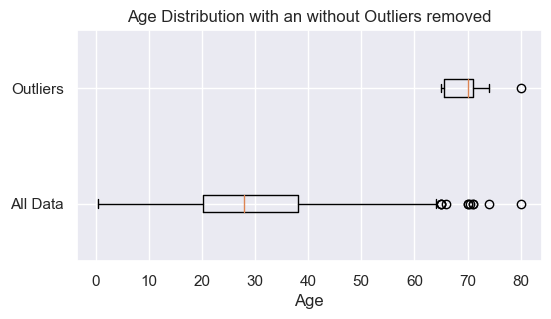

In [81]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

#=>1.1 - import three datasets into dataframe names provided; drop cabin/ticket columns
url_raw = "https://github.com/cosc-526/home.page/raw/main/data.M.2.titanic.raw.data.xls"
url_train = "https://raw.githubusercontent.com/cosc-526/home.page/main/data.M.2.titanic_train.csv"
url_test = "https://raw.githubusercontent.com/cosc-526/home.page/main/data.M.2.titanic_test.csv"
df_raw = pd.read_excel(url_raw)
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

df_train.drop(columns=["cabin", "ticket"], inplace=True)

# 1.2 - identify and sum the missing values per column in a table
print("==> Data fields with null information:")
#print(df_raw.head())
print(df_train.isna().sum())
print("----------------------------------------")


#=>1.3 - identify outliers in a table and.or graphic for age variable useing the interquartile range  

# IQR calculation - START
p25 = df_train['age'].quantile(0.25)
p75 = q3 = df_train['age'].quantile(0.75)
iqr = p75 - p25
cutoff = iqr * 1.5
lower = p25 - cutoff
upper = p75 + cutoff
# IQR calculation - END

# get list of outliers
outliers = [x for x in df_train.age if x < lower or x > upper]

# # Plot missing values (alternatives OK)
# plt.figure(figsize=(6, 2))
# plt.bar(??,??)
# plt.xticks(rotation=45)
# plt.xlabel('Variable')
# plt.ylabel('Count of Missing Values')
# plt.title('Missing Values in Data')
# plt.show()

print("----------------------------------------")
print('Outliers from [', lower,'to', upper,'] data range : ',sorted(set(outliers)))
print("\n")
print("Table of outlier values to assess:")
print(df_train[df_train['age'].isin(outliers)])
print("----------------------------------------")


#1.4 - would you use mean substitution for missing values?
#Overall Answer: Probably not a good idea as there is almost 2 years difference and it will skew the data.
age_mean = df_train['age'].mean()
age_median = df_train['age'].median()
print('Mean age : ', age_mean, ' Median age : ',age_median)

#=> compare age outliers to age without outliers using a plot made with seaborn / sns

combined_data = [df_train['age'].dropna(), outliers]
sns.set_theme()

#  Plot age data in a box and whiskers chart  (alternatives OK)
plt.figure(figsize=(6,3))
plt.boxplot(combined_data, labels=['All Data', 'Outliers'], vert=False)
plt.xlabel('Age')
plt.title('Age Distribution with and without Outliers removed')
plt.show()

#### **`Stage 2: Feature Extraction`**
- `Feature Scaling:` Scale numerical features to ensure similar ranges  
=> techniques like z-score normalization scaling or standardization.  
- `Feature Selection:` what features contribute most to the target variable?  
=> techniques like remove redundant features to improve performance and reduce overfitting.  

`Tasks.Stage.2`   
=> your response variable is `survival`  
2.1 - read and bookmark scikitlearn [6.3 Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html)  
2.2 - perform `one-hot encoding` of categorical variable `sex`; display df header    
2.3 - perform `standarscaler` for a new age variable in df_train    

Given the resourcs provided thus far,  
2.4 - `Q:` Would you perform supervised or unsupervised machine learning?  
2.5 - `Q:` What algorithms would you choose to run?  

`Useful resources`   
- [sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn-preprocessing-onehotencoder) 
- [sklearn.preprocessing.standardscaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn-preprocessing-standardscaler)  

##### **`Tasks.Stage.2.Solution`**  

   pclass  survived                                             name      age  \
0       1         1                    Allen, Miss. Elisabeth Walton  29.0000   
1       1         1                   Allison, Master. Hudson Trevor   0.9167   
2       1         0                     Allison, Miss. Helen Loraine   2.0000   
3       1         0             Allison, Mr. Hudson Joshua Creighton  30.0000   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  25.0000   

   sibsp  parch  ticket      fare    cabin embarked boat   body  \
0      0      0   24160  211.3375       B5        S    2    NaN   
1      1      2  113781  151.5500  C22 C26        S   11    NaN   
2      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  sex_female  sex_male  
0                     St Louis, MO           1     

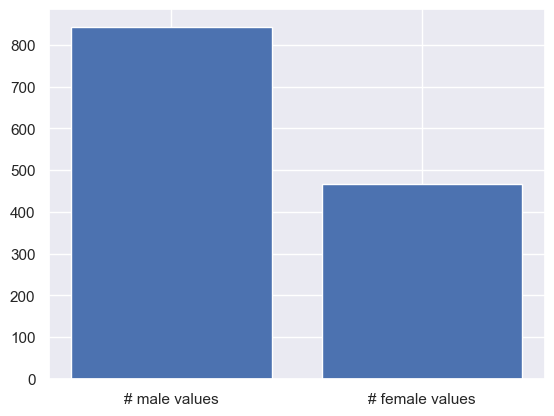

In [75]:
#This code has been provided
#=>2.1 - read and bookmark (https://scikit-learn.org/stable/modules/preprocessing.html)  
df_encoded = pd.get_dummies(df_raw, columns=['sex'])
print(df_encoded.head()) #2 new variables created

import matplotlib.pyplot as plt
df_encoded = pd.get_dummies(df_raw, columns=['sex'])
counts = [df_encoded['sex_male'].sum(), df_encoded['sex_female'].sum()]
plt.bar(['# male values', '# female values'], counts)
plt.show()

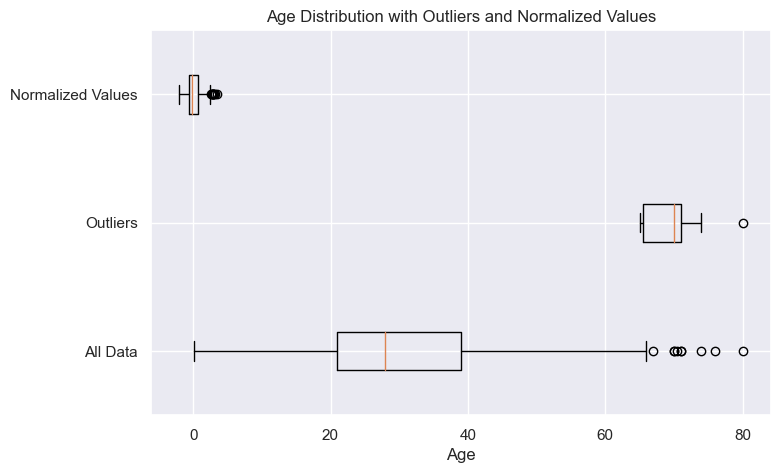

In [78]:
#This code has been provided
#=>2.3 - perform `standarscaler` for a new age variable   
# Create DataFrame for all data (excluding outliers)
df_train = df_train[~df_train['age'].isin(outliers)]

scaler = StandardScaler()
all_data = df_raw
all_data.loc[:, 'scaled_new_age'] = scaler.fit_transform(all_data[['age']].values.reshape(-1, 1))

# Exclude missing values from 'age' variable and scaled new age
age_data = all_data['age'].dropna()
scaled_age_data = all_data['scaled_new_age'].dropna()

# combine all age data
combined_data = [age_data, outliers, scaled_age_data]

# Plot all data, outliers, and normalized values in the same graph
plt.figure(figsize=(8, 5))
plt.boxplot(combined_data, labels=['All Data', 'Outliers', 'Normalized Values'], vert=False)
plt.xlabel('Age')
plt.title('Age Distribution with Outliers and Normalized Values')
plt.show()



#### **`Stage 3: Machine Learning + Stage 4: Model Evaluation`**  
- `Imputation` - either modify unrepaired data, drop it, or dig deeper  
- `Data Split` Split the preprocessed dataset into train\test to assess algorithmic effectiveness.  
- `Train` using the preprocessed training data.  

**`Stage.3.items`**  
3.1 - 
`logistic regression` on a train \ test of the raw data with 
- features = ['sex', 'age', 'fare', 'pclass']
- X = df_train[features]
- y = df_train['survived']

**`Stage.4.items`**  
4.1 Assess accuracy  
4.2 Assess Cross validation  

**`Stage.5.items`**  
5.1 Assess confusion matrix  

**`Tasks`**  
- Task.3 - write a description confirming sequence of machine learning activities
- Task.4 - write a description confirming understanding of evaluation activities  
- Task.5 - write a description confirming understanding of visualization activities  

#Enter Answer.
#Remember to read the code below to understand the code.

#=> Task.3 - write a description confirming the 5 sequences of machine learning activities, with a short description of each

1. Data Collection and Preprocessing:
   - This sequence involves collecting relevant data for the machine learning task. The data can come from various sources such as databases, APIs, or files. Once collected, the data needs to be preprocessed, which includes tasks like cleaning the data, handling missing values, encoding categorical variables, and normalizing numerical features. The goal is to prepare the data in a format suitable for machine learning algorithms.

2. Feature Extraction (Engineering and Selection):
   - In this sequence, the collected data is analyzed to extract meaningful features that can help in making accurate predictions or classifications. Feature engineering involves creating new features or transforming existing ones to improve the predictive power of the model. Feature selection techniques are then applied to identify the most relevant features, reducing dimensionality and improving model efficiency.

3. Model Training (Machine Learning):
   - This sequence involves selecting an appropriate machine learning algorithm and training it on the prepared dataset. The dataset is split into training and testing sets to evaluate the performance of the trained model. During training, the model learns the underlying patterns and relationships in the data. Evaluation metrics such as accuracy, precision, recall, or mean squared error are used to assess the model's performance and determine its effectiveness in making predictions.

4. Model Evaluation (Optimization and Hyperparameter Tuning):
   - After evaluating the initial model, this sequence focuses on optimizing its performance. Techniques such as hyperparameter tuning, cross-validation, and regularization are employed to fine-tune the model. Hyperparameters are parameters that are not learned from the data but set before training, such as learning rate, number of hidden layers, or regularization strength. By systematically adjusting these hyperparameters, the model's performance can be optimized to achieve better results.

5. Model Visualization (Deployment and Monitoring):
   - Once the model has been trained and optimized, it can be deployed for real-world use. This sequence involves integrating the model into a production environment, creating APIs or applications that utilize the model's predictions. The deployed model is then monitored to ensure its continued performance, and periodic updates or retraining may be necessary to maintain its accuracy as new data becomes available.

These sequences represent a typical workflow in machine learning, encompassing the essential steps from data collection and preprocessing to model deployment and monitoring. Each step plays a crucial role in developing accurate and reliable machine learning models.

#=> Task.4 - write a description confirming understanding of evaluation activities

The accuracy is a measure of how well the model predicts the correct labels. In this case, the accuracy is 1.0, which means the model achieved a perfect accuracy of 100%. This indicates that all the predictions made by the model on the test set (X_test) matched the true labels (y_test) perfectly. The accuracy score is calculated by dividing the number of correct predictions by the total number of predictions.

#=> Task.5 - write a description confirming understanding of visualization activities   

The resulting plot provides a visual representation of the confusion matrix, allowing for a better understanding of the model's performance in predicting the true and predicted labels.

In [83]:
#this code provided
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

'''Stage.3.Tasks'''
#=>3.1 perform a logistic regression train \ test on the raw data with 
#=>- features = ['sex', 'age', 'fare', 'pclass']
#=>- X = df_train[features]
#=>- y = df_train['survived']

# Load the Titanic dataset
url_train = "https://raw.githubusercontent.com/cosc-526/home.page/main/data.M.2.titanic_train.csv"
df_train = pd.read_csv(url_train)

features = ['sex', 'age', 'fare', 'pclass'] # Select features 
X = df_train[features]                      # Prepare features
y = df_train['survived']

X_encoded = pd.get_dummies(X, drop_first=True) # one-hot encoding on categorical

# Handle missing values 
imputer = SimpleImputer(strategy='mean')  ## imputing with the mean
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

''' 
'**`Stage.4.Tasks
#=> 4.1 assess accuracy'''

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,0))

#=> 4.2 access Cross validation  
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Accuracy: 1.0
Confusion Matrix:
[[89 16]
 [20 54]]


**`Stage 5: Visualization`**

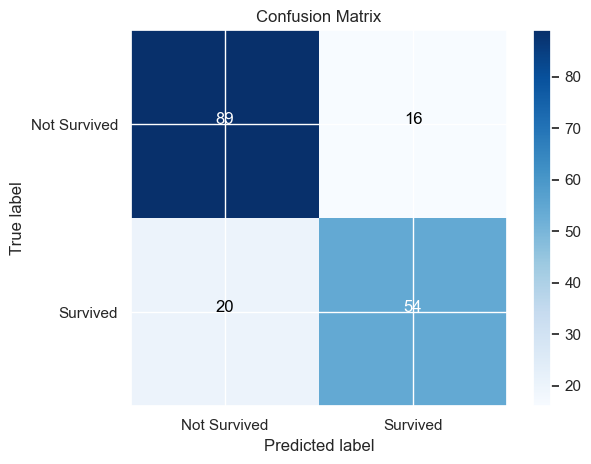

In [84]:
#this code provided
import numpy as np
import matplotlib.pyplot as plt

# Define the confusion matrix
confusion_matrix = np.array(confusion)

# Define the class labels
classes = ['Not Survived', 'Survived']

# Plot the confusion matrix
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Label the matrix cells
thresh = confusion_matrix.max() / 2.
for i, j in np.ndindex(confusion_matrix.shape):
    plt.text(j, i, format(confusion_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix[i, j] > thresh else "black")

# Add axis labels
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

# Show the plot
plt.show()
